# Demonstration of `pdfplumber`'s `extract_table` method.

This notebook uses `pdfplumber` to extract data from an [California Worker Adjustment and Retraining Notification (WARN) report](../pdfs/ca-warn-report.pdf).

### Import `pdfplumber`

In [1]:
import pdfplumber
print(pdfplumber.__version__)

0.7.1


### Load the PDF

In [2]:
pdf = pdfplumber.open("../pdfs/ca-warn-report.pdf")

### Get the first page

In [3]:
p0 = pdf.pages[0]

### Display the first page

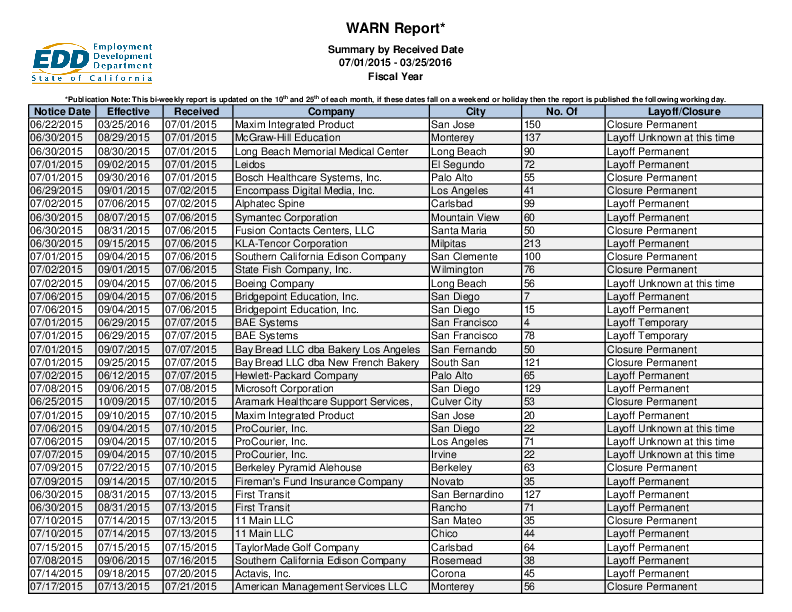

In [4]:
im = p0.to_image()
im

### Use `.extract_table` to get the data from the largest table on the page

In [5]:
table = p0.extract_table()

`.extract_table` returns a list of lists, with each inner list representing a row in the table. Here are the first three rows:

In [6]:
table[:3]

[['Notice Date',
  'Effective',
  'Received',
  'Company',
  'City',
  'No. Of',
  'Layoff/Closure'],
 ['06/22/2015',
  '0  3  / 2  5  / 2  0  16',
  '0  7  / 0  1  / 2  0  15',
  'Maxim Integrated Product',
  'San Jose',
  '150',
  'Closure Permanent'],
 ['06/30/2015',
  '0  8  / 2  9  / 2  0  15',
  '0  7  / 0  1  / 2  0  15',
  'McGraw-Hill Education',
  'Monterey',
  '137',
  'Layoff Unknown at this time']]

## Basic cleanup

We can use `pandas` to render the list as a DataFrame, and to remove the extra spaces within some of the dates.

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(table[1:], columns=table[0])
for column in ["Effective", "Received"]:
    df[column] = df[column].str.replace(" ", "")

In [9]:
df

,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure
0,06/22/2015,03/25/2016,07/01/2015,Maxim Integrated Product,San Jose,150,Closure Permanent
1,06/30/2015,08/29/2015,07/01/2015,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time
2,06/30/2015,08/30/2015,07/01/2015,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent
3,07/01/2015,09/02/2015,07/01/2015,Leidos,El Segundo,72,Layoff Permanent
4,07/01/2015,09/30/2016,07/01/2015,"Bosch Healthcare Systems, Inc.",Palo Alto,55,Closure Permanent
5,06/29/2015,09/01/2015,07/02/2015,"Encompass Digital Media, Inc.",Los Angeles,41,Closure Permanent
6,07/02/2015,07/06/2015,07/02/2015,Alphatec Spine,Carlsbad,99,Layoff Permanent
7,06/30/2015,08/07/2015,07/06/2015,Symantec Corporation,Mountain View,60,Layoff Permanent
8,06/30/2015,08/31/2015,07/06/2015,"Fusion Contacts Centers, LLC",Santa Maria,50,Closure Permanent
9,06/30/2015,09/15/2015,07/06/2015,KLA-Tencor Corporation,Milpitas,213,Layoff Permanent


## How did it work?

We can use `pdfplumber`'s visual debugging to show how the table was extracted. The red lines represent the lines `pdfplumber` found on the page; the blue circles represent the intersections of those lines, and the light-blue shading indicates the cells derived from those intersections.

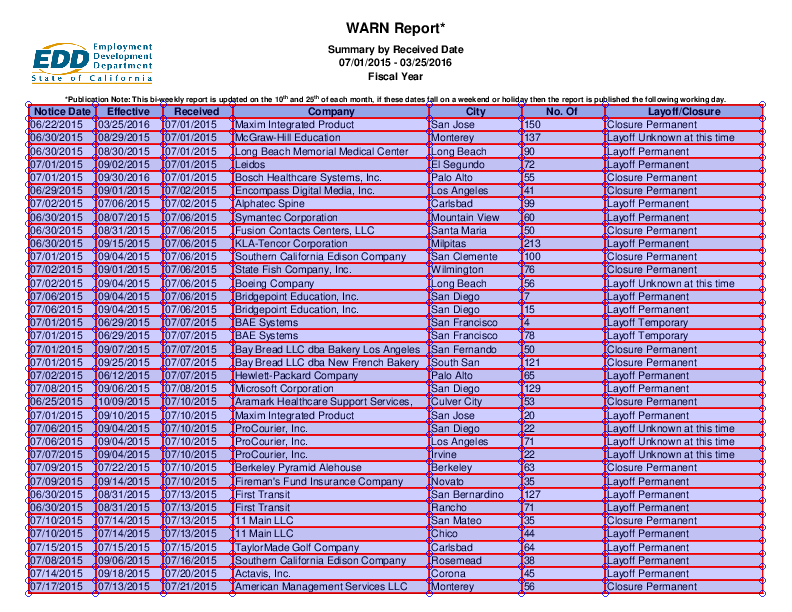

In [10]:
im.debug_tablefinder()

---

---

---